# selenium을 사용한 이유

selenium이 아닌 requests를 사용해서 할 경우

In [1]:
from urllib.parse import quote_plus

import requests
import lxml.html

In [2]:
query = 'President%20Donald%20Trump%27s%20speech'  

본 사이트는 requests를 사용하게 될 경우 query에 들어가야 할 구조가 너무 복잡해지기 때문에 이 경우에서는 selenium이 requests를 사용하는 것 보다 편리하다.

In [3]:
url = 'http://www.politico.com/search/{page}?q={query}'

In [4]:
articles = []
for page in range(2, 3):
    search_url = url.format(query=query, page=page)
    res = requests.get(search_url)
    root = lxml.html.fromstring(res.text)
    for link in root.cssselect('h3 a'):  # 링크 추출
        news = requests.get(link.attrib['href'])
        news_root = lxml.html.fromstring(news.text)
        article = news_root.cssselect('div.story-text')[0]  # 본문 추출
        text = article.text_content()
        articles.append(text)

IndexError: list index out of range

In [ ]:
len(articles)

# 미대통령 '도널드 트럼프'가 연설 중에 가장 자주 사용하는 단어는?

## 크롬 띄우기

In [18]:
from selenium.webdriver import Chrome

In [19]:
browser = Chrome()

## 미국 정치전문지 POLITICO 

In [20]:
browser.get('http://www.politico.com/')

## 검색창 클릭

In [21]:
button = browser.find_element_by_css_selector('#globalWrapper > div.global-header > div > nav.nav-micro > ul > li.subnav.micro-core-header-search-link.format-m.pos-beta > a > b')

In [22]:
button.click()

## 검색

In [23]:
query = browser.find_element_by_css_selector('#searchTerm')

In [24]:
query.send_keys('President Donald Trump speech\n')

## implicitly_wait

브라우저가 로딩이 끝날 때까지 최대 몇 초간 기다리도록 설정

In [25]:
browser.implicitly_wait(5) # 로딩이 끝날 때까지 최대 5초간 대기

## 제목 가져오기

In [26]:
titles = browser.find_elements_by_css_selector('h3 a')

In [27]:
len(titles)

20

## 링크 받기

In [28]:
for title in titles:
    print(title.get_attribute('href'))

https://www.politico.com/tipsheets/morning-score/2016/11/president-donald-trump-217309
https://www.politico.com/story/2015/06/donald-trump-2016-announcement-10-best-lines-119066.html
https://www.politico.com/story/2017/02/trump-twitter-attacks-president-234620
https://www.politico.com/story/2016/08/donald-trump-immigration-address-transcript-227614
https://www.politico.com/story/2017/02/donald-trump-first-month-presidency-235118
https://www.politico.com/story/2017/04/27/the-education-of-donald-trump-237669
https://www.politico.com/story/2016/08/donald-trump-100-days-226850
https://www.politico.com/blogs/2016-gop-primary-live-updates-and-results/2016/03/cnn-not-responsible-donald-trump-rise-220895
https://www.politico.com/story/2016/09/is-donald-trump-qualified-to-be-president-228657
https://www.politico.com/tipsheets/playbook/2015/08/jeb-jabs-hillary-in-speech-tonight-at-reagan-library-where-was-secretary-of-state-clinton-club-for-growth-takes-on-trump-ailes-truce-donald-on-fox-twice-t

## 다음 페이지로 이동

In [29]:
nxt1 = browser.find_element_by_css_selector('a.button')  # Next 링크를 찾는다

In [30]:

browser.execute_script("arguments[0].scrollIntoView()", nxt1)  # next 링크로 화면을 스크롤 시킨다

In [31]:
nxt1.click()  # Next 링크를 클릭

In [32]:
nxt2 = browser.find_element_by_css_selector('#globalWrapper > main > div:nth-child(2) > div > div > section.content-groupset.pos-alpha > div:nth-child(4) > div > div > nav > div.contextual > a:nth-child(2)')  #1페이지와 2페이지에 걸린 다음버튼 링크가 각각 다르기에 2페이지부터 시작.

In [33]:
nxt2.click()

In [34]:
import time

In [35]:
time.sleep(4) # 검색 결과가 다 뜰 때까지 2초간 기다린다.

## requests로 기사 본문 긁기

In [36]:
import requests
import lxml.html

In [37]:
url = 'http://www.politico.com/story/2017/10/02/full-text-donald-trumps-speech-on-las-vegas-shooting-243365'

In [38]:
res = requests.get(url)

In [39]:
root = lxml.html.fromstring(res.text)

In [40]:
body = root.cssselect('div.story-text')

In [41]:
body[0].text_content()

"\n                            \n                            \n        \n    \n    \n            \n            \n            \n        \n    \n\n                    \n                    \n                    \n                \n            \n    \n        \n            \n                \n                    \n        \n            \n            \n            \n        \n    \n\n            \n        \n    \n\n\n            \n                \n                    Full text: Donald Trump's speech on Las Vegas shooting\n                        \n\n                \n            \n    \n                \n                \n            \n        \n            By POLITICO STAFF\n    10/02/2017 11:35 AM EDT\n                    \n\n        \n        \n             Share on Facebook\n             Share on Twitter\n        \n    \n.cms-textAlign-left{text-align:left;}.cms-textAlign-center{text-align:center;}.cms-textAlign-right{text-align:right;}.cms-magazineStyles-smallCaps{font-variant:small-

## 여러 페이지 본문 긁기

In [42]:
from urllib.parse import quote_plus

import requests
import lxml.html

In [43]:
url = 'http://www.politico.com/search/{page}?q=President%20Donald%20Trump%20speech'

### 1페이지와 2페이지에 걸린 다음버튼 링크가 각각 다르기에 2페이지부터 시작.

## ※문제점 및 해결

-> 1페이지 버튼에 걸린 링크만 이후에 있는 페이지 버튼에 걸린 링크와 다르기에 페이지 시작을 2페이지로 설정하여 
시작해 줌으로써 오류발생을 방지하고 정상적으로 크롤링하였음.

In [44]:
nxt1 = browser.find_element_by_css_selector('a.button')  # Next 링크를 찾는다

In [45]:
browser.execute_script("arguments[0].scrollIntoView()", nxt1)  # next 링크로 화면을 스크롤 시킨다

In [46]:
nxt1.click()  # Next 링크를 클릭

In [47]:
articles = []  # 기사를 저장할 리스트
for page in range(2,22):  # 22페이지까지 
    titles = browser.find_elements_by_css_selector('h3 a')  # 기사 제목 찾기
    for title in titles:
        url = title.get_attribute('href')  # 기사 주소
        res = requests.get(url)  # requests로 기사 가져오기
        root = lxml.html.fromstring(res.text)  # HTML 처리
        body = root.cssselect('div.story-text')  # body 클래스 선택
        if body:  # body가 존재하는 경우에만
            articles.append(body[0].text_content())  # 텍스트 내용 가져오기
    
    nxt = browser.find_element_by_css_selector('#globalWrapper > main > div:nth-child(2) > div > div > section.content-groupset.pos-alpha > div:nth-child(4) > div > div > nav > div.contextual > a:nth-child(2)')
    browser.execute_script("arguments[0].scrollIntoView()", nxt)  # next 링크로 화면을 스크롤 시킨다
    nxt.click()
    time.sleep(3)

In [49]:
len(articles)

388

In [50]:
articles

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


## 빈도순 단어 보기

In [51]:
from konlpy.tag import Komoran

In [52]:
tagger = Komoran()

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

In [54]:
def get_noun(body):
    nouns = tagger.nouns(body)
    return [n for n in nouns if len(n) > 2]  # 3글자 이상인 명사만 추출

In [55]:
cv = CountVectorizer(stop_words=None, analyzer=get_noun, max_features=1000)

In [56]:
tdm = cv.fit_transform(articles)

In [57]:
import numpy

In [58]:
import operator

In [59]:
words = cv.get_feature_names()

In [60]:
count_mat = tdm.sum(axis=0)

In [61]:
count = numpy.squeeze(numpy.asarray(count_mat))

In [62]:
word_count = list(zip(words, count))

In [63]:
word_count = sorted(word_count, key=operator.itemgetter(1), reverse=True)

In [64]:
word_count

[('U.S.', 1203),
 ('I am', 169),
 ('The Wall', 96),
 ("I've", 68),
 ('CBS News', 31),
 ('Thank you', 31),
 ('L.A.', 30),
 ('The U.S.', 30),
 ('Jr.', 29),
 ('The Associated Press', 25),
 ('U.K.', 21),
 ('USA Today', 21),
 ("Christie's", 18),
 ('Los Angeles Times', 16),
 ('AT&T', 14),
 ('C-SPAN', 12),
 ('The Guardian', 11),
 ('The Times', 9),
 ('G-20', 8),
 ('H-1', 8),
 ('Associated Press', 7),
 ('H-2', 7),
 ('G.O', 6),
 ('K-12', 6),
 ('MS-13', 6),
 ('Made in', 6),
 ('S&P 500', 6),
 ('Saturday Night Live', 6),
 ('You and I', 6),
 ('F-35', 5),
 ('No. 1', 5),
 ('I AM', 4),
 ('I love you', 4),
 ('Rolling Stone', 4),
 ('S&P', 4),
 ('Sunday Morning', 4),
 ('The Economist', 4),
 ('This time', 4),
 ('G20', 3),
 ('Good Morning', 3),
 ('Google News', 3),
 ('Google Play', 3),
 ("McDonald's", 3),
 ('Ph.D', 3),
 ('South Side', 3),
 ('The Chronicle of Higher Education', 3),
 ('The Way', 3),
 ('A little bit', 2),
 ('A.J.', 2),
 ('AK-47', 2),
 ('Baltimore Sun', 2),
 ('Come on', 2),
 ('E-mail', 2),
 ("I

## WordCloud

In [65]:
%matplotlib inline

In [66]:
from matplotlib import pyplot
from wordcloud import WordCloud

In [67]:
wc = WordCloud(font_path='C:\\Windows\\Fonts\\malgun.ttf', background_color='white', width=400, height=300)

In [68]:
cloud = wc.fit_words(dict(word_count))

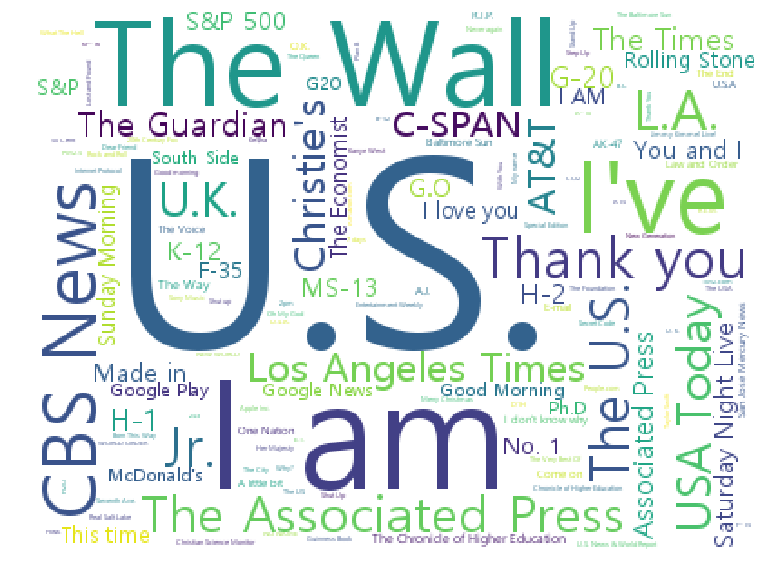

In [69]:
pyplot.figure(figsize=(20, 10))
pyplot.imshow(cloud)
pyplot.axis("off")
pyplot.show()